In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime as dt
import numpy as np

### Importing data for time-series analysis
The follwoing analysis uses the heirarchy CensusTracts -> Districts -> City where, the districts are the 9 districts of Baltimore city (N, W, E, C, SE, SW, S, NE, NW)

In [15]:
dfDaily = pd.read_csv('HighEmer.csv')
dfDaily['Date']=pd.to_datetime(dfDaily['Date'])
dfSum = dfDaily['Count'].groupby(dfDaily['Date'].dt.date).sum()
dfSum = pd.DataFrame(data=dfSum)
dfSum = dfSum.reset_index()
dfSum = dfSum.rename(columns={"Date": "ds","Count":"y"})
dfSum['ds'] = pd.to_datetime(dfSum['ds'])
dfSum['y0']=1

startDate = dt.date(2015, 3, 8)
stopDate = dt.date(2018, 12, 31)

,CallDateTime,Count,Date,Census_Tracts,PoliceDistrict,New_district
0,2013-07-01,6,2013-07-01,1503.00,Western,6.0
1,2013-07-02,6,2013-07-02,1503.00,Western,6.0
2,2013-07-03,9,2013-07-03,1503.00,Western,6.0
3,2013-07-04,5,2013-07-04,1503.00,Western,6.0
4,2013-07-05,1,2013-07-05,1503.00,Western,6.0
...,...,...,...,...,...,...
505644,2020-05-28,1,2020-05-28,2720.05,Northwestern,5.0
505645,2020-05-29,4,2020-05-29,2720.05,Northwestern,5.0
505646,2020-05-30,1,2020-05-30,2720.05,Northwestern,5.0
505647,2020-05-31,2,2020-05-31,2720.05,Northwestern,5.0


In [1]:
# fig, axs = plt.subplots(1,1,figsize=(20,5))
# axs.plot_date(dfSum['ds'],dfSum['y'])
# # axs.set_xlim([dt.date(2015, 2, 1), dt.date(2015, 4, 1)])
# plt.show()

1836.1141851935024
1625.5825990373937
929.885305105853


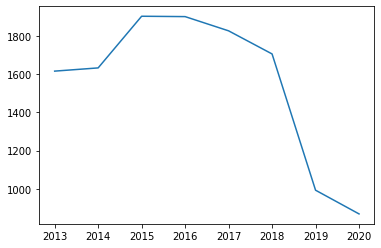

In [5]:
means = dfSum['y'].groupby(dfSum['ds'].dt.year).mean()
plt.plot(means)

mean1, mean2, mean3 = [], [], []
for i in range(2015,2019):
    mean1.append(means[i])
for i in [2013,2014]:
    mean2.append(means[i])
for i in [2019,2020]:
    mean3.append(means[i])
    
mean1 = np.mean(mean1)
mean2 = np.mean(mean2)
mean3 = np.mean(mean3)

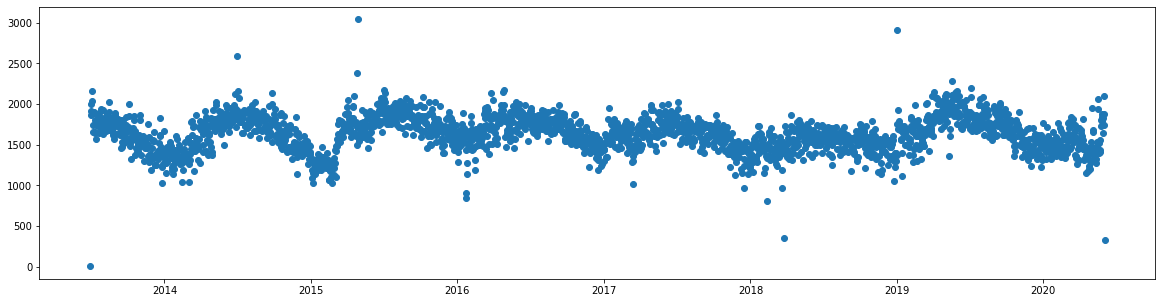

In [6]:
# print(mean2/mean1)
dfSum['y0'] = dfSum['y']
for i in range(2015,2019):
    Temp = dfSum[dfSum['ds'].dt.year==i]
    x = Temp['y'] * mean2/mean1
    dfSum.loc[dfSum.ds.dt.year==i,'y0'] = x
for i in range(2019,2021):
    Temp = dfSum[dfSum['ds'].dt.year==i]
    x = Temp['y'] * mean2/mean3
    dfSum.loc[dfSum.ds.dt.year==i,'y0'] = x

dfSum = dfSum.rename(columns={"y0": "y","y":"yOrg"})


fig, axs = plt.subplots(1,1,figsize=(20,5))
axs.plot_date(dfSum['ds'],dfSum['y'])
plt.show()

### Transforming to format required for heirarchical time series analysis

In [10]:
labels0 = dfDaily.Census_Tracts.unique().astype(str).tolist()
labels = dfDaily.PoliceDistrict.unique().astype(str).tolist()

dfhts = pd.DataFrame()
dfhts['total'] = dfDaily.groupby(pd.Grouper(key='Date', freq='D'))['Count'].sum()

for i in range(0,len(dfDaily.PoliceDistrict.unique())):
    PD = dfDaily.PoliceDistrict.unique()[i]
    newLabel = labels[i]
    Temp = dfDaily[dfDaily['PoliceDistrict']==PD]
    dfhts[newLabel] = Temp.groupby(pd.Grouper(key='Date', freq='D'))['Count'].sum()

for i in range(0,len(dfDaily.Census_Tracts.unique())):
    CT = dfDaily.Census_Tracts.unique()[i]
    newLabel = labels0[i]
    Temp = dfDaily[dfDaily['Census_Tracts']==CT]
    dfhts[newLabel] = Temp.groupby(pd.Grouper(key='Date', freq='D'))['Count'].sum()
    
dfhts = dfhts.fillna(0)
dfhts = dfhts[1:-2]
# dfhts

,total,Western,Southwestern,Southern,Northwestern,Central,Southeastern,Northeastern,Northern,Eastern,...,2502.04,102.0,2707.02,2403.0,2707.01,2303.0,1308.04,2715.03,2703.02,2720.05
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,1911,166.0,203,233.0,198,267.0,249.0,247,180.0,168.0,...,8.0,7.0,6.0,1.0,3.0,3.0,5.0,6.0,2.0,0.0
2013-07-02,1868,194.0,201,184.0,237,252.0,210.0,236,170.0,184.0,...,5.0,6.0,4.0,6.0,1.0,1.0,4.0,3.0,1.0,2.0
2013-07-03,1997,183.0,210,206.0,230,287.0,236.0,302,180.0,163.0,...,10.0,7.0,12.0,0.0,3.0,4.0,4.0,2.0,1.0,0.0
2013-07-04,2165,178.0,259,218.0,305,239.0,292.0,301,188.0,185.0,...,17.0,10.0,4.0,4.0,4.0,5.0,2.0,5.0,3.0,3.0
2013-07-05,2039,171.0,242,243.0,241,247.0,240.0,307,171.0,177.0,...,13.0,6.0,4.0,2.0,5.0,9.0,7.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,1026,109.0,126,148.0,124,92.0,103.0,161,79.0,84.0,...,3.0,3.0,1.0,0.0,4.0,6.0,1.0,0.0,1.0,4.0
2020-05-28,939,89.0,114,131.0,101,102.0,91.0,148,89.0,74.0,...,8.0,3.0,2.0,0.0,2.0,2.0,3.0,2.0,2.0,1.0
2020-05-29,1045,97.0,126,113.0,117,106.0,128.0,183,73.0,102.0,...,6.0,0.0,7.0,1.0,1.0,1.0,2.0,1.0,0.0,4.0


In [11]:
dfhtsNorm = pd.DataFrame()
k = 0
for i in [2013,2014]:
    if len(dfhtsNorm)!=0:        
        dTemp = dfhts[dfhts.index.year==i]* mean2/mean2
        dfhtsNorm = pd.concat([dfhtsNorm,dTemp])
    else:
        dfhtsNorm = dfhts[dfhts.index.year==i]* mean2/mean2
    k+=1
    
k = 0
for i in range(2015,2019):
    if len(dfhtsNorm)!=0:        
        dTemp = dfhts[dfhts.index.year==i]* mean2/mean1
        dfhtsNorm = pd.concat([dfhtsNorm,dTemp])
    else:
        dfhtsNorm = dfhts[dfhts.index.year==i]* mean2/mean1
    k+=1

k = 0
for i in range(2019,2021):
    if len(dfhtsNorm)!=0:        
        dTemp = dfhts[dfhts.index.year==i] * mean2/mean3
        dfhtsNorm = pd.concat([dfhtsNorm,dTemp])
    else:
        dfhtsNorm = dfhts[dfhts.index.year==i] * mean2/mean3
    k+=1

dfhtsNorm = dfhtsNorm[:-2]
dfhtsNorm

,total,Western,Southwestern,Southern,Northwestern,Central,Southeastern,Northeastern,Northern,Eastern,...,2502.04,102.0,2707.02,2403.0,2707.01,2303.0,1308.04,2715.03,2703.02,2720.05
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,1911.000000,166.000000,203.000000,233.000000,198.000000,267.000000,249.000000,247.000000,180.000000,168.000000,...,8.000000,7.000000,6.000000,1.000000,3.000000,3.000000,5.000000,6.000000,2.000000,0.000000
2013-07-02,1868.000000,194.000000,201.000000,184.000000,237.000000,252.000000,210.000000,236.000000,170.000000,184.000000,...,5.000000,6.000000,4.000000,6.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000
2013-07-03,1997.000000,183.000000,210.000000,206.000000,230.000000,287.000000,236.000000,302.000000,180.000000,163.000000,...,10.000000,7.000000,12.000000,0.000000,3.000000,4.000000,4.000000,2.000000,1.000000,0.000000
2013-07-04,2165.000000,178.000000,259.000000,218.000000,305.000000,239.000000,292.000000,301.000000,188.000000,185.000000,...,17.000000,10.000000,4.000000,4.000000,4.000000,5.000000,2.000000,5.000000,3.000000,3.000000
2013-07-05,2039.000000,171.000000,242.000000,243.000000,241.000000,247.000000,240.000000,307.000000,171.000000,177.000000,...,13.000000,6.000000,4.000000,2.000000,5.000000,9.000000,7.000000,1.000000,2.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25,1875.769107,176.563541,225.511850,204.534003,251.734158,153.837541,192.296926,326.904775,143.348618,201.037696,...,29.718616,1.748154,5.244462,3.496308,5.244462,1.748154,3.496308,0.000000,1.748154,1.748154
2020-05-26,1837.309722,185.304311,197.541388,293.689851,227.260004,199.289542,160.830156,272.712004,136.356002,164.326464,...,19.229693,3.496308,0.000000,8.740769,8.740769,1.748154,0.000000,0.000000,6.992615,3.496308
2020-05-27,1793.605875,190.548772,220.267388,258.726773,216.771080,160.830156,180.059849,281.452774,138.104156,146.844925,...,5.244462,5.244462,1.748154,0.000000,6.992615,10.488923,1.748154,0.000000,1.748154,6.992615


### Constructing Heirarchy 

In [34]:
import json
from hts.hierarchy import HierarchyTree

# PD_tract = pd.read_csv(ND_file)
PD_tract = pd.read_csv('Tract_PD2.csv')
PD_tract = PD_tract.drop(columns = ['Unnamed: 0'])
# PD_tract

In [35]:
PoliceDistricts = dfDaily.PoliceDistrict.unique().astype(str)
Census_Tracts = dfDaily.Census_Tracts.unique().astype(str)

# Here we build the tree as a dictionary. Each node (key in dict) has a list of 
# children value in dict, which in turn may also be a key in the dict, and have 
# children as well 
total = {'total': list(PoliceDistricts)}
district_h = {k: list(PD_tract[PD_tract['Police_district'].astype(str)==k]
                       ['census_tracts'].unique().astype(str)) 
              for k in PoliceDistricts}

hierarchy = {**total, **district_h}

with open('hierarchy.json', 'w') as j:
    json.dump(hierarchy, j)

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=dfhts)

### Implementing heriarchical time series with optimal revision method - Ordinary Least Square 
(identified through trials)
The undelying time-series model used is FB prophet, by default annual seaosnlity is set to True and daily seasonality to false, which is appropriate for our use case (additionally, holidays, weekends etc were not found to have significant impact specially since we are interested in weekly aggomerated data.
Prophet has issues with dealing with discontinuous data such as weekly, if it has not seen that particular day of the week during training. Therefore, data aggolemration to weeks is done post-prediction.

In [36]:
from hts import HTSRegressor
clf = HTSRegressor(model='prophet', revision_method='OLS', n_jobs=0)

In [37]:
dfUse = dfhtsNorm #[dfhtsNorm.index < '2018-01-01']
model = clf.fit(dfUse, hierarchy, disable_progressbar=False) 

In [38]:
preds = model.predict(steps_ahead=365, disable_progressbar=False)

INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014503FC4E08>


In [39]:
preds.to_csv('HTSPredictions.csv')

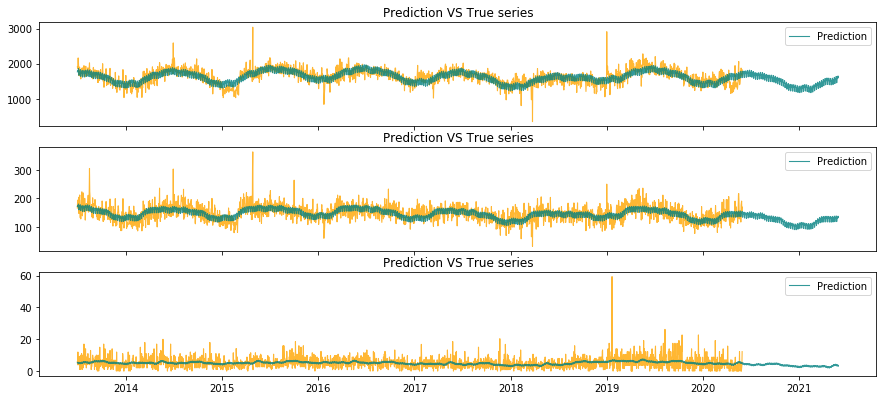

In [41]:
# preds.to_csv('Final_predictions.csv')
PLOT = [     
        'total',
        'Western',
        '2707.02',
       ]

fig, axs = plt.subplots(len(PLOT), figsize=(15, 6.5), sharex=True)

dts = preds.index

for i, group in enumerate(PLOT):
    axs[i].plot(dfhtsNorm[group], 
            lw=1.1, 
            color='orange', # '#2ecc71', 
            alpha=0.8, 
            linestyle='-')#, marker='o',markersize=4)
    axs[i].plot(preds[group], 
            lw=1.1,
            color='teal',#'#e74c3c', 
            alpha=0.8, 
            label='Prediction')
    axs[i].legend()
    axs[i].set_title('Prediction VS True series')

### Error Function for Cross Valdation on test set

In [42]:
def MAPE_func(pred, actual):
    # labels = (dfDaily.New_district.unique().astype(str).tolist())
# labels = labels + ['total']
    labels = dfDaily.Census_Tracts.unique().astype(str).tolist()
# print(labels)

    pred = pred[labels].reset_index()
    pred = pred.groupby(pd.Grouper(key='Date', freq='W')).sum()
    pred = pred.reset_index(drop=True)
    
    actual = actual[labels].reset_index()    
    actual = actual.groupby(pd.Grouper(key='Date', freq='W')).sum()    
    actual = actual.reset_index(drop=True)
    
    return ((abs(pred-actual)/(actual+1)*100)).mean().mean()

In [43]:
dfUse = dfhtsNorm

#[(dfhtsNorm.index < '31-05-19') & (dfhtsNorm.index > '23-12-14')]
#[(dfhtsNorm.index.year < 2019) & (dfhtsNorm.index.year > 2013)] 

datesCV = dfUse.index 
nsteps = 130
nstart = int(len(datesCV)*0.8)

# datesCV = dfhtsNorm.index
# nsteps = 180
# p = preds[datesCV[0]:]
# a = dfhtsNorm[datesCV[0]:]
# MAPE_func(p,a)

### Establishing baseline error estimate
Naive prediction assumes that the predicted value next week will be the same as the value last year for the same week - based on annual seasonality of data)

In [45]:
j = 0
errorBase = [] #
for i in range(2*nsteps,len(datesCV),nsteps):
    endDate = min(i+nsteps, len(datesCV)-1)
    
    pred = dfUse[datesCV[i+1-365]:datesCV[endDate-365]]    
    actual = dfUse[datesCV[i+1]:datesCV[endDate]]
#     for i in range(0,len(pred)):
#         pred[i]=np.mean(pred)
    MAPE0 = MAPE_func(pred,actual)
    errorBase.append(MAPE0)
    print('step ' + str(j+1) + ' error = ' + str(MAPE0) + ' %')    
    j+=1
    
np.mean(errorBase[1:])

step 1 error = nan %
step 2 error = 33.88582374098375 %
step 3 error = 34.86490726887232 %
step 4 error = 41.65618771592792 %
step 5 error = 36.78492494869327 %
step 6 error = 32.367291759498265 %
step 7 error = 31.790891010903223 %
step 8 error = 32.33869616867138 %
step 9 error = 34.83364647165214 %
step 10 error = 34.154825872124725 %
step 11 error = 42.149745126715025 %
step 12 error = 34.68230564535223 %
step 13 error = 31.234724486501836 %
step 14 error = 36.524739603088044 %
step 15 error = 33.90882820656882 %
step 16 error = 42.599185951629586 %
step 17 error = 45.05248763382707 %
step 18 error = 62.23967159543713 %


37.70993430626157

In [46]:
def pred_to_pred(pred1):    
    pred2 = pred1
    pred2 = pred2.reset_index()
    pred2 = pred2.rename(columns={"index": "Date"})
    # pred2 = pred2.drop(['level_0'], axis=1)
    pred2 = pred2.set_index('Date')
    return pred2

### Measuring walk-forward cross validation error for the HTS model used.
Walk-forward duration = 3 months, on 20% of test data (split chronologically)

In [47]:
errorPred = []
j = 0
for i in range(2*nsteps,len(datesCV),nsteps):  #(nstart,len(datesCV)-nsteps,nsteps): #    
    endDate = min(i+nsteps, len(datesCV)-1)
    
    train = dfUse[datesCV[0]:datesCV[i]]    
    model = clf.fit(train, hierarchy, disable_progressbar=True)     
    pred1 = model.predict(steps_ahead=nsteps,disable_progressbar=True)[
        datesCV[i+1]:datesCV[endDate]]   
    actual1 = dfUse[datesCV[i+1]:datesCV[endDate]]
    pred2 = pred_to_pred(pred1)
    
    MAPE = MAPE_func(pred2,actual1)
    errorPred.append(MAPE)
    print('step ' + str(j) + ' error = ' + str(MAPE) + ' %')    
    j+=1
    
np.mean(errorPred)

INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000145049E9D48>


step 0 error = 28.02611021335114 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014504AD8E48>


step 1 error = 39.90858381399542 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014502B06548>


step 2 error = 36.09276573790039 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014576DEFC88>


step 3 error = 25.95319980549024 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000145048E3548>


step 4 error = 25.905925424673388 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000145049AAEC8>


step 5 error = 29.761032482007025 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014502E4ABC8>


step 6 error = 30.38289432706511 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014502B720C8>


step 7 error = 25.81083359879342 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014502F05448>


step 8 error = 27.907547800104368 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x000001450358F4C8>


step 9 error = 26.3981362123139 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000145034D2388>


step 10 error = 25.75981481369104 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014503EA1948>


step 11 error = 27.73815144866412 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x000001450347EB08>


step 12 error = 23.345678950254893 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000145133361C8>


step 13 error = 29.736283966382135 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014504814F48>


step 14 error = 27.368652432974645 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014504A98C08>


step 15 error = 35.834880172131946 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014513518D08>


step 16 error = 40.9535385328533 %


INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000014502A9A848>


step 17 error = 44.57424887903576 %


30.63657103398235